<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass6/bdm/Sambal/BigDataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 6: Mastering Big Data Handling**

**GROUP NAME: SAMBAL**

**TEAM MEMBERS:**
```
MOHD NOR BIN MOHIDIN (MCS231008)
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
```

##Downloading Kaggle Data set directly into Google Colab

In [ ]:
# Install Kaggle Phyton Library
! pip install kaggle

In [ ]:
# Mount the Google Drive to store Kaggle API Credential
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Make a directory for Kaggle at temporary location on drive
! mkdir ~/.kaggle

In [ ]:
# upload the jason file to google drive and copy to temporary location
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d threnjen/2019-airline-delays-and-cancellations -f full_data_flightdelay.csv

 98% 80.0M/81.5M [00:00<00:00, 137MB/s]
100% 81.5M/81.5M [00:00<00:00, 120MB/s]


In [ ]:
! unzip full_data_flightdelay.csv.zip

Archive:  full_data_flightdelay.csv.zip
  inflating: full_data_flightdelay.csv  


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Checking how much memory used if loading full CSV

In [ ]:
# Checking information if loading full CSV

df = pd.read_csv("full_data_flightdelay.csv")
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Columns: 26 entries, MONTH to AWND
dtypes: float64(9), int64(13), object(4)
memory usage: 2.9 GB


##Strategies for Big Dataset

###**1) Load Less Data**

Load only required columns instead all columns

In [ ]:
# Check the columns name
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

In [ ]:
# Only 10 columns needed instead of 26 columns

df = pd.read_csv("full_data_flightdelay.csv", usecols=['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP','SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS','CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH'])

# View Sampel Data for 10 columns
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH
0,1,7,0,0800-0859,2,1,25,Southwest Airlines Co.,13056,107363
1,1,7,0,0700-0759,7,1,29,Delta Air Lines Inc.,13056,73508
2,1,7,0,0600-0659,7,1,27,Delta Air Lines Inc.,13056,73508
3,1,7,0,0600-0659,9,1,27,Delta Air Lines Inc.,13056,73508
4,1,7,0,0001-0559,7,1,10,Spirit Air Lines,13056,15023
...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,2300-2359,1,11,3,Hawaiian Airlines Inc.,1318,7268
6489058,12,7,0,1800-1859,1,11,2,Hawaiian Airlines Inc.,1318,7268
6489059,12,7,0,2000-2059,1,11,2,Hawaiian Airlines Inc.,1318,7268
6489060,12,7,0,2100-2159,1,12,3,Hawaiian Airlines Inc.,1318,7268


Checking memory used after load only 10 columns needed

In [ ]:
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Columns: 10 entries, MONTH to AIRLINE_FLIGHTS_MONTH
dtypes: int64(8), object(2)
memory usage: 1.3 GB


As a result, load less data which is load only required columns has reduce memory usage from 2.9 GB to 1.3 GB

###**2) Use Chunking**

In [ ]:
# Declare the size of the chunk in the beginning.
# Then using read_csv() with the chunksize parameter, returns an object we can iterate over.

chunk_size=50000
batch_no=1
for chunk in pd.read_csv('full_data_flightdelay.csv',chunksize=chunk_size):
    chunk.to_csv('chunk'+str(batch_no)+'.csv',index=False)
    batch_no+=1

In [ ]:
# Now we have multiple chunks, and each chunk can easily be loaded as a pandas dataframe.

df1 = pd.read_csv('chunk1.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          50000 non-null  int64  
 1   DAY_OF_WEEK                    50000 non-null  int64  
 2   DEP_DEL15                      50000 non-null  int64  
 3   DEP_TIME_BLK                   50000 non-null  object 
 4   DISTANCE_GROUP                 50000 non-null  int64  
 5   SEGMENT_NUMBER                 50000 non-null  int64  
 6   CONCURRENT_FLIGHTS             50000 non-null  int64  
 7   NUMBER_OF_SEATS                50000 non-null  int64  
 8   CARRIER_NAME                   50000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          50000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          50000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  50000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       50000 non-null 

As a result, chunk has reduced the memory usage from 2.9 GB to 0.99 GB by subdividing dataset into smaller part.

###**3) Optimize Data Types**

In [ ]:
# Check if the dataset have null values.
df.isnull().sum()

MONTH                    0
DAY_OF_WEEK              0
DEP_DEL15                0
DEP_TIME_BLK             0
DISTANCE_GROUP           0
SEGMENT_NUMBER           0
CONCURRENT_FLIGHTS       0
CARRIER_NAME             0
AIRPORT_FLIGHTS_MONTH    0
AIRLINE_FLIGHTS_MONTH    0
dtype: int64

In [ ]:
# Check memory size before optimize data types
from sys import getsizeof
start_size = getsizeof(df)/(1024.0**3)
print('Dataframe size: %2.2f GB'%start_size)

Dataframe size: 1.25 GB


In [ ]:
df.dtypes


MONTH                     int64
DAY_OF_WEEK               int64
DEP_DEL15                 int64
DEP_TIME_BLK             object
DISTANCE_GROUP            int64
SEGMENT_NUMBER            int64
CONCURRENT_FLIGHTS        int64
CARRIER_NAME             object
AIRPORT_FLIGHTS_MONTH     int64
AIRLINE_FLIGHTS_MONTH     int64
dtype: object

In [ ]:
# Find the minimum and maximum values for each columns
columns = ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP','SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS','CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH']

min_values = df[columns].min()
max_values = df[columns].max()

print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)


Minimum values:
MONTH                                       1
DAY_OF_WEEK                                 1
DEP_DEL15                                   0
DEP_TIME_BLK                        0001-0559
DISTANCE_GROUP                              1
SEGMENT_NUMBER                              1
CONCURRENT_FLIGHTS                          1
CARRIER_NAME             Alaska Airlines Inc.
AIRPORT_FLIGHTS_MONTH                    1100
AIRLINE_FLIGHTS_MONTH                    5582
dtype: object

Maximum values:
MONTH                                       12
DAY_OF_WEEK                                  7
DEP_DEL15                                    1
DEP_TIME_BLK                         2300-2359
DISTANCE_GROUP                              11
SEGMENT_NUMBER                              15
CONCURRENT_FLIGHTS                         109
CARRIER_NAME             United Air Lines Inc.
AIRPORT_FLIGHTS_MONTH                    35256
AIRLINE_FLIGHTS_MONTH                   117728
dtype: object


In [ ]:
# Convert Integer data type into smaller data type (uint8, uint16)
# Define columns and their corresponding dtypes based on the min and max values
columns_and_dtypes = {
    'MONTH': 'uint8' if 0 <= df['MONTH'].min() and df['MONTH'].max() <= 255 else 'uint16',
    'DAY_OF_WEEK': 'uint8' if 0 <= df['DAY_OF_WEEK'].min() and df['DAY_OF_WEEK'].max() <= 255 else 'uint16',
    'DISTANCE_GROUP': 'uint8' if 0 <= df['DISTANCE_GROUP'].min() and df['DISTANCE_GROUP'].max() <= 255 else 'uint16',
    'SEGMENT_NUMBER': 'uint8' if 0 <= df['SEGMENT_NUMBER'].min() and df['SEGMENT_NUMBER'].max() <= 255 else 'uint16',
    'CONCURRENT_FLIGHTS': 'uint8' if 0 <= df['CONCURRENT_FLIGHTS'].min() and df['CONCURRENT_FLIGHTS'].max() <= 255 else 'uint16',
    'AIRPORT_FLIGHTS_MONTH': 'uint8' if 0 <= df['AIRPORT_FLIGHTS_MONTH'].min() and df['AIRPORT_FLIGHTS_MONTH'].max() <= 255 else 'uint16',
    'AIRLINE_FLIGHTS_MONTH': 'uint8' if 0 <= df['AIRLINE_FLIGHTS_MONTH'].min() and df['AIRLINE_FLIGHTS_MONTH'].max() <= 255 else 'uint16',
}

# Apply the conversion to each column
df = df.astype(columns_and_dtypes)

# Now df contains the Integer columns datatypes has converted to their optimal integer types


In [ ]:
# Convert integer Datatype into boolen data type
# Column 'DEP_DEP15' is either 0 or 1, so boolean is sufficient instead of integer

df.DEP_DEL15 = df.DEP_DEL15.apply(lambda x: x==1)

# Now the column 'DEP_DEP15' has coverted to boolen datatype

Column 'CARRIER_NAME' not suitable to convert Datatype from Object into Category because of too many different values. While Column 'DEP_TIME_BLK' can't convert from string to datetime64 due to different format which will cause a null values.

In [ ]:
# Check the DF Types after optimized Data Types
df.dtypes


MONTH                     uint8
DAY_OF_WEEK               uint8
DEP_DEL15                  bool
DEP_TIME_BLK             object
DISTANCE_GROUP            uint8
SEGMENT_NUMBER            uint8
CONCURRENT_FLIGHTS        uint8
CARRIER_NAME             object
AIRPORT_FLIGHTS_MONTH    uint16
AIRLINE_FLIGHTS_MONTH    uint16
dtype: object

In [ ]:
# Check Final Size after change the data types

final_size = getsizeof(df)/(1024.0**3)
print('Dataframe size: %2.2f GB'%final_size)

Dataframe size: 0.93 GB


In [ ]:
# Calculate total size reduction after optimize data types.
print('total size reduction: %2.1f'%(((start_size-final_size)/start_size)*100))

total size reduction: 26.0


As a result, after optimized the Data Types into uint8, uint16 and boolen, the data frame size has reduce 26% which is from 1.25 GB to 0.93 GB.

###**4) Sampling**

In [ ]:
# Checking how much memory used before sampling
df2 = pd.read_csv("full_data_flightdelay.csv")
df2.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Columns: 26 entries, MONTH to AWND
dtypes: float64(9), int64(13), object(4)
memory usage: 2.9 GB


In [ ]:
# Knowing the numbers of rows and column of data frame

df2.shape

(6489062, 26)

In [ ]:
# Random sampling of 10% of Dataset
sample1 = df2.sample(frac=0.10)
sample1

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
2079042,5,5,0,1500-1559,4,1,94,158,Delta Air Lines Inc.,34238,...,21,Atlanta Municipal,33.641,-84.427,NONE,0.00,0.0,0.0,94.0,5.59
2849347,6,6,1,2100-2159,8,3,29,187,American Airlines Inc.,7008,...,4,Miami International,25.792,-80.286,Douglas Municipal,0.78,0.0,0.0,85.0,7.61
5264448,10,3,0,0900-0959,4,2,60,76,SkyWest Airlines Inc.,22355,...,4,Stapleton International,39.774,-104.880,Birmingham Airport,0.01,0.0,0.0,83.0,15.21
1441549,3,4,0,1700-1759,11,2,6,234,American Airlines Inc.,4143,...,4,Honolulu International,21.319,-157.922,Chicago O'Hare International,0.00,0.0,0.0,70.0,5.14
3933321,8,2,0,1500-1559,2,6,9,143,Southwest Airlines Co.,5606,...,13,San Jose International,37.363,-121.941,Hollywood-Burbank Midpoint,0.00,0.0,0.0,91.0,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252600,10,5,0,1500-1559,5,4,44,76,Endeavor Air Inc.,13751,...,11,Minneapolis-St Paul International,44.886,-93.218,Pittsburgh International,0.04,0.0,0.0,83.0,12.53
3422269,7,4,0,1300-1359,2,3,4,90,Comair Inc.,4310,...,3,Cleveland-Hopkins International,41.411,-81.849,Douglas Municipal,0.06,0.0,0.0,88.0,5.82
595367,2,7,0,1700-1759,2,4,21,186,Frontier Airlines Inc.,11500,...,3,McCarran International,36.080,-115.152,Cincinnati/Northern Kentucky International,0.00,0.0,0.0,61.0,10.96
1036005,3,1,0,1200-1259,2,4,26,50,Endeavor Air Inc.,9511,...,15,Philadelphia International,39.868,-75.249,Raleigh-Durham International,0.09,0.0,0.0,37.0,14.09


In [ ]:
# Check memory used after 10% sampling
sample1.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648906 entries, 2079042 to 3393639
Columns: 26 entries, MONTH to AWND
dtypes: float64(9), int64(13), object(4)
memory usage: 300.5 MB


In [ ]:
# Random sampling by rows (axis 0) or columns (axis 1)

sample2 = df2.sample(n=10000,axis=0)
sample2

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
666117,2,1,0,1600-1659,3,5,14,149,Delta Air Lines Inc.,7168,...,27,Miami International,25.792,-80.286,Atlanta Municipal,0.06,0.0,0.0,79.0,11.18
2557925,5,2,0,1300-1359,6,2,4,180,Frontier Airlines Inc.,1209,...,9,Truax Field,43.142,-89.337,McCarran International,0.00,0.0,0.0,70.0,4.25
1782016,4,3,0,0600-0659,4,1,17,76,SkyWest Airlines Inc.,13176,...,13,Detroit Metro Wayne County,42.217,-83.344,NONE,0.03,0.0,0.0,58.0,8.50
2117248,5,1,1,1600-1659,2,5,8,76,"Midwest Airline, Inc.",4271,...,11,Pittsburgh International,40.497,-80.236,LaGuardia,0.01,0.0,0.0,75.0,13.42
3785271,8,7,0,1500-1559,4,3,11,160,Delta Air Lines Inc.,4171,...,18,Cincinnati/Northern Kentucky International,39.048,-84.669,Salt Lake City International,0.00,0.0,0.0,92.0,5.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6365892,12,6,0,0900-0959,3,1,29,76,Endeavor Air Inc.,13493,...,5,LaGuardia,40.779,-73.876,NONE,1.13,0.0,0.0,56.0,12.08
2211138,5,5,0,1400-1459,1,4,55,90,Comair Inc.,19807,...,5,Douglas Municipal,35.219,-80.936,Northwest Florida Regional,0.00,0.0,0.0,91.0,5.82
4008357,8,6,0,1200-1259,4,2,13,100,JetBlue Airways,7501,...,14,Fort Lauderdale-Hollywood International,26.074,-80.152,Westchester County,0.27,0.0,0.0,92.0,4.47
218270,1,5,0,0900-0959,11,1,22,149,Alaska Airlines Inc.,10278,...,11,John F. Kennedy International,40.639,-73.777,NONE,0.00,0.0,0.0,47.0,9.84


In [ ]:
# Check memory used after 10000 random rows sampling
sample2.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 666117 to 5818007
Columns: 26 entries, MONTH to AWND
dtypes: float64(9), int64(13), object(4)
memory usage: 4.6 MB


As a result, after sampling, memory usage has tremendously reduced which is from 2.9 GB to 300.5 MB (89.6%) if used 10% of sample and reduce to 4.6 MB (99.8%) if choose only 10,000 out of 6,489,062 rows as sampling.

###**5) Parallelize with Dask**

In [ ]:
# Reading a Dataframe with Pandas

%%time

df3_pd=pd.read_csv("full_data_flightdelay.csv")


CPU times: user 27.3 s, sys: 6.12 s, total: 33.4 s
Wall time: 33.8 s


In [ ]:
# Reading a Dataframe with Dask

%%time

import dask.dataframe as dd
df3_dd=pd.read_csv("full_data_flightdelay.csv")

CPU times: user 28.5 s, sys: 2.14 s, total: 30.6 s
Wall time: 32.3 s


In [ ]:
# Merging Dataframe using Pandas

temp1=df3_pd.head(5000)
temp2=df3_pd.tail(5000)


In [ ]:
%%time

pdmerge=pd.merge(temp1,temp2)

CPU times: user 37.8 ms, sys: 24 µs, total: 37.8 ms
Wall time: 63.7 ms


In [ ]:
# Merging Dataframe using Dask

temp3=df3_dd.head(5000)
temp4=df3_dd.tail(5000)

In [ ]:
%%time

ddmerge = dd.merge(temp3,temp4)

CPU times: user 27.4 ms, sys: 0 ns, total: 27.4 ms
Wall time: 27.3 ms


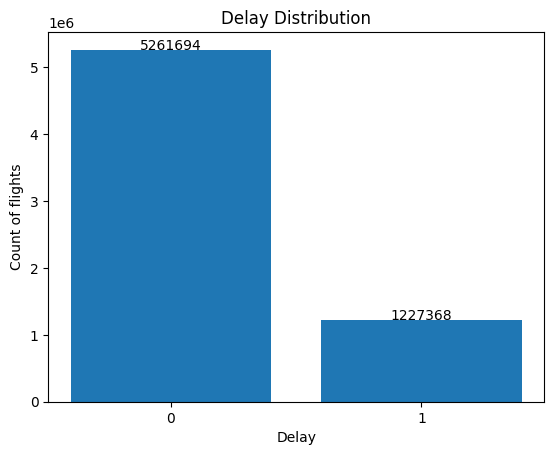

CPU times: user 388 ms, sys: 48.9 ms, total: 437 ms
Wall time: 537 ms


In [ ]:
%%time

values = df3_pd["DEP_DEL15"].value_counts()

# Create a new figure
plt.figure()

# Add a bar plot of the data
plt.bar(values.index, values.values)

# Add the value of each bar to the plot
for i, v in enumerate(values.values):
    plt.text(i, v, str(v), ha='center')

# Set the x-axis tick labels
plt.xticks(list(values.index))

# Add a title and axis labels
plt.title("Delay Distribution")
plt.xlabel("Delay")
plt.ylabel("Count of flights")

# Show the plot
plt.show()

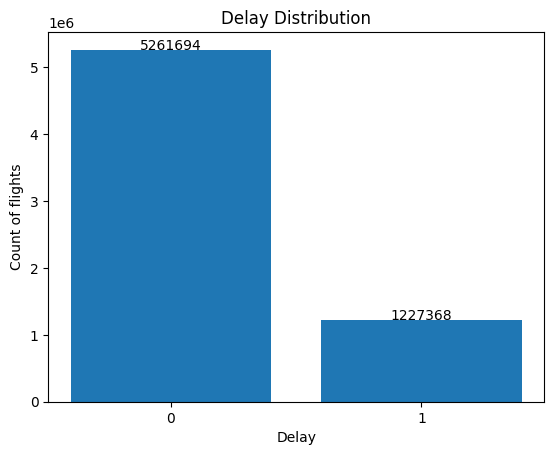

CPU times: user 268 ms, sys: 92.7 ms, total: 361 ms
Wall time: 250 ms


In [ ]:
# Create Figure using Dask

%%time

values = df3_dd["DEP_DEL15"].value_counts()

# Create a new figure
plt.figure()

# Add a bar plot of the data
plt.bar(values.index, values.values)

# Add the value of each bar to the plot
for i, v in enumerate(values.values):
    plt.text(i, v, str(v), ha='center')

# Set the x-axis tick labels
plt.xticks(list(values.index))

# Add a title and axis labels
plt.title("Delay Distribution")
plt.xlabel("Delay")
plt.ylabel("Count of flights")

# Show the plot
plt.show()

Below is the result after 3 comparison above:

a) Reading Dataframe:
   Pandas = 33.8s;
   Dask = 32.3s

b) Merging dataframe:
   Pandas = 63.7ms;
   Dask = 27.3ms

c) Create Figure:
   Pandas = 537ms;
   Dask = 250ms

Based on the comparison above, reading dataframe, merging dataframe and create figures shows that Dask take less time compared to Pandas due to parallel computing in Dask. This indicates that when involve data manipulation, Dask will take less time than Pandas. This is because, parallel computing in Dask is like a single task done by four workers meanwhile done by the single worker in Pandas.

##Comparative Analysis

Comprehensive comparative analysis between traditional methods and advanced strategies are as follows:-

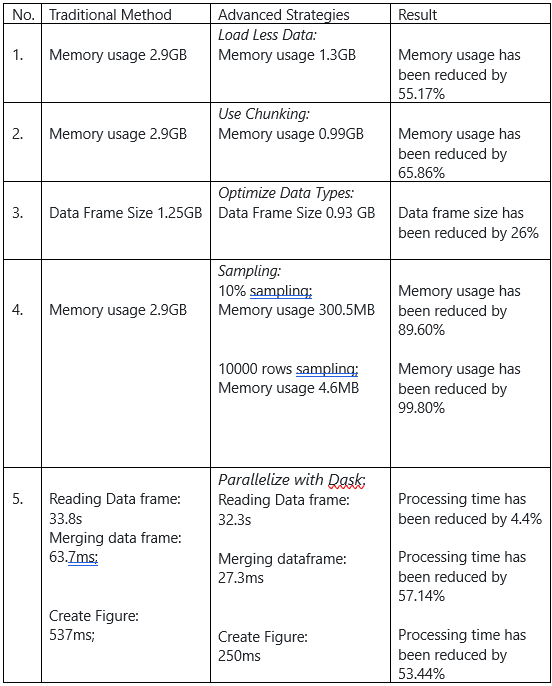




Based on the above comparative analysis, it indicates that the traditional method which is Pandas may have some limitations when dealing with large datasets in terms of memory usage and processing time. The advanced strategies give us the opportunity if Pandas still is an option for analysis where these strategies can reduce memory usage, enhance processing speed, and provide efficient ways to handle large datasets.

##Conclusion

In conclusion, the advanced strategies allow us to handle big data in Pandas as follows: -

a)	Load less data:: Instead of loading the entire dataset into memory, only loading the specific columns or rows that are required for the analysis will reduce the memory footprint and speed up operations. However, it may affect the decision due to not representing the entire dataset.

b)	Use chunking: When dealing with large datasets, chunks allow to processing of the data in smaller pieces to avoid memory issues. This is particularly useful when performing operations that don't require the entire dataset to be in memory simultaneously. However, certain operations might be more complex when working with chunks

c)	Optimized data types: Choosing the most memory-efficient data types for each column can significantly reduce memory usage and speed up computations due to reduced data size. Thus, it can improve overall performance.

d)	Sampling: Analyzing a sample of the data also can reduce memory usage and take less time for processing. Moreover, sampling can provide insights and help in understanding the overall characteristics of the dataset. However, certain rare events or patterns might be missed due to sampling might not represent the entire population accurately.

e)	Parallelize with Dask: Dask enables parallel and distributed computing, allowing computations to be split across multiple cores or even distributed across a cluster. This will help in handling larger-than-memory datasets by efficiently utilizing available computational resources.

In summary, depending on our goal, sampling strategies are the best for exploration purposes. In case we need to process all of our data, we can try iterating over data or optimizing the data types. If our dataset is still too large and takes more time to process, then we can go for Dask to parallelize Pandas. All of these strategies collectively aim to reduce memory usage, enhance processing speed, and provide efficient ways to handle large datasets without overwhelming system resources.
